In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.13.0


In [3]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [4]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

In [5]:
# データ確認
data.head(10)

,x,y
0,0.000000,0.888679
1,0.005025,1.672880
2,0.010050,0.734615
3,0.015075,1.364275
4,0.020101,1.612892
5,0.025126,1.343923
6,0.030151,1.034580
7,0.035176,0.147828
8,0.040201,0.926792
9,0.045226,1.084572


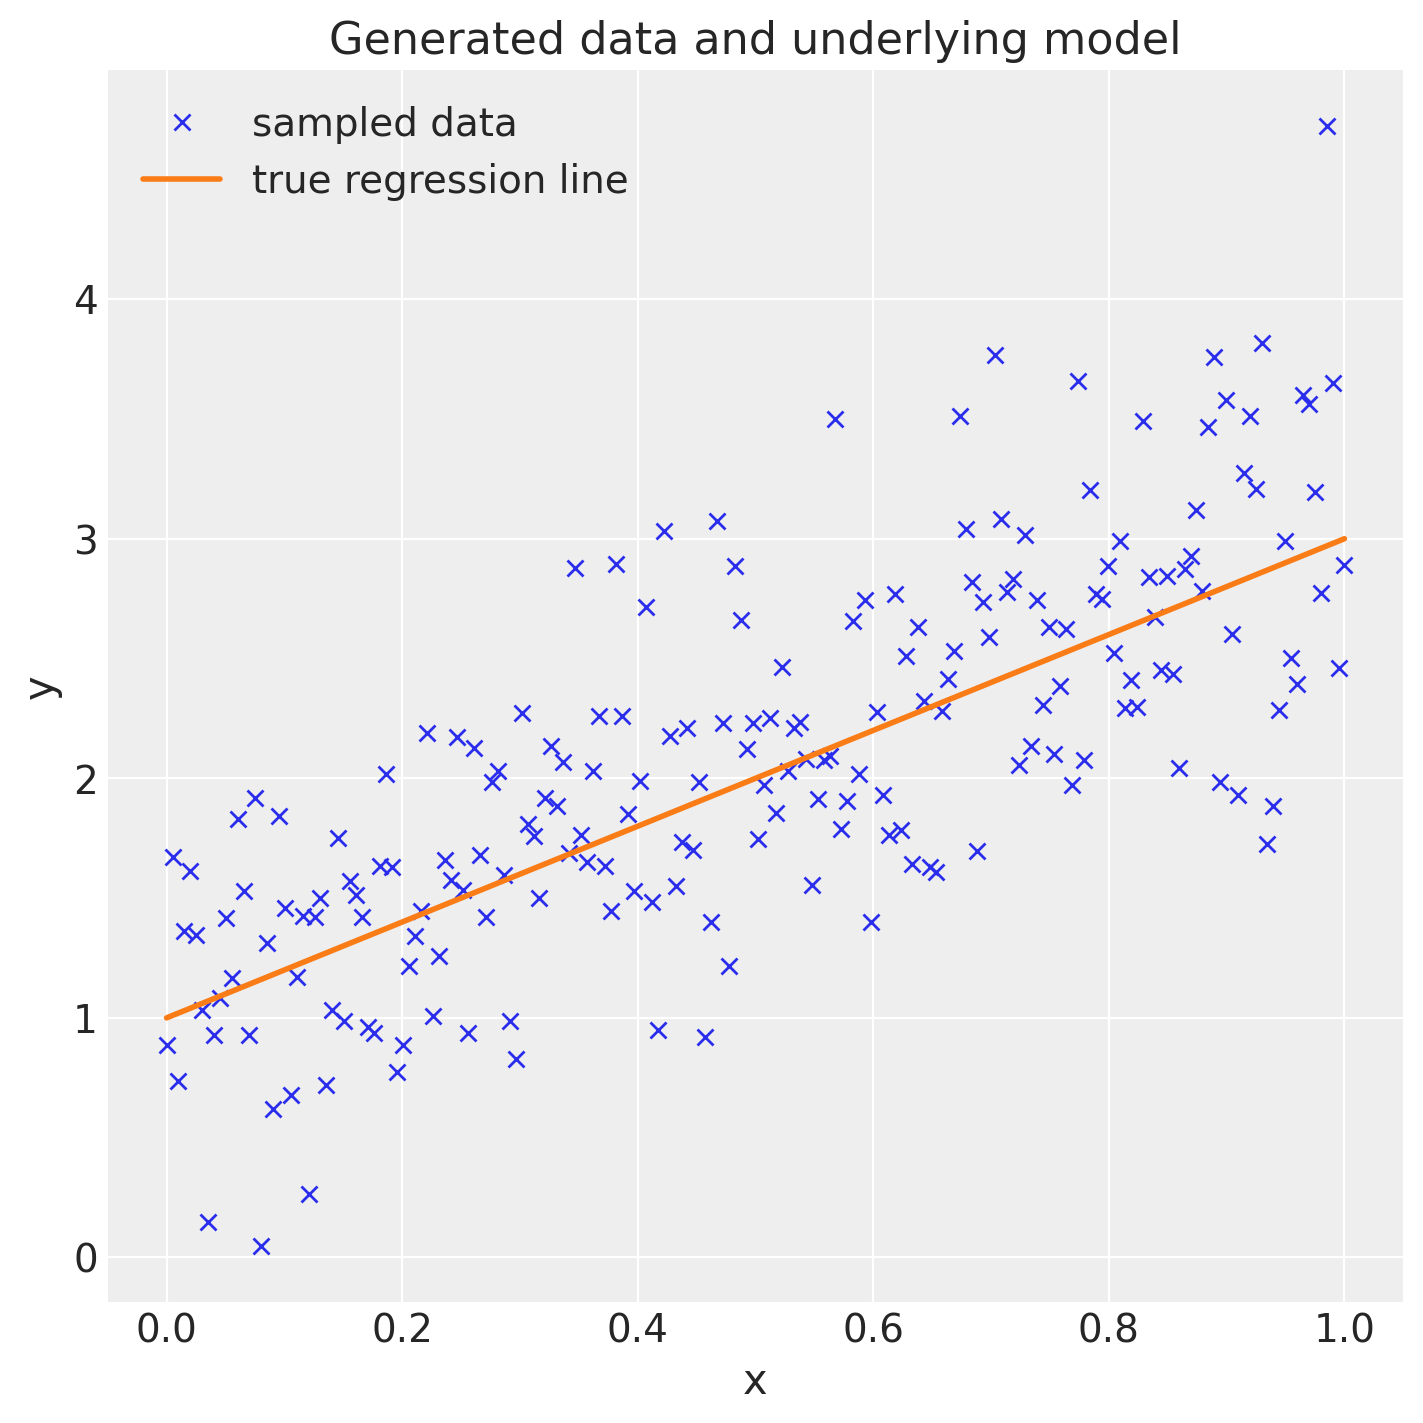

In [6]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [7]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.


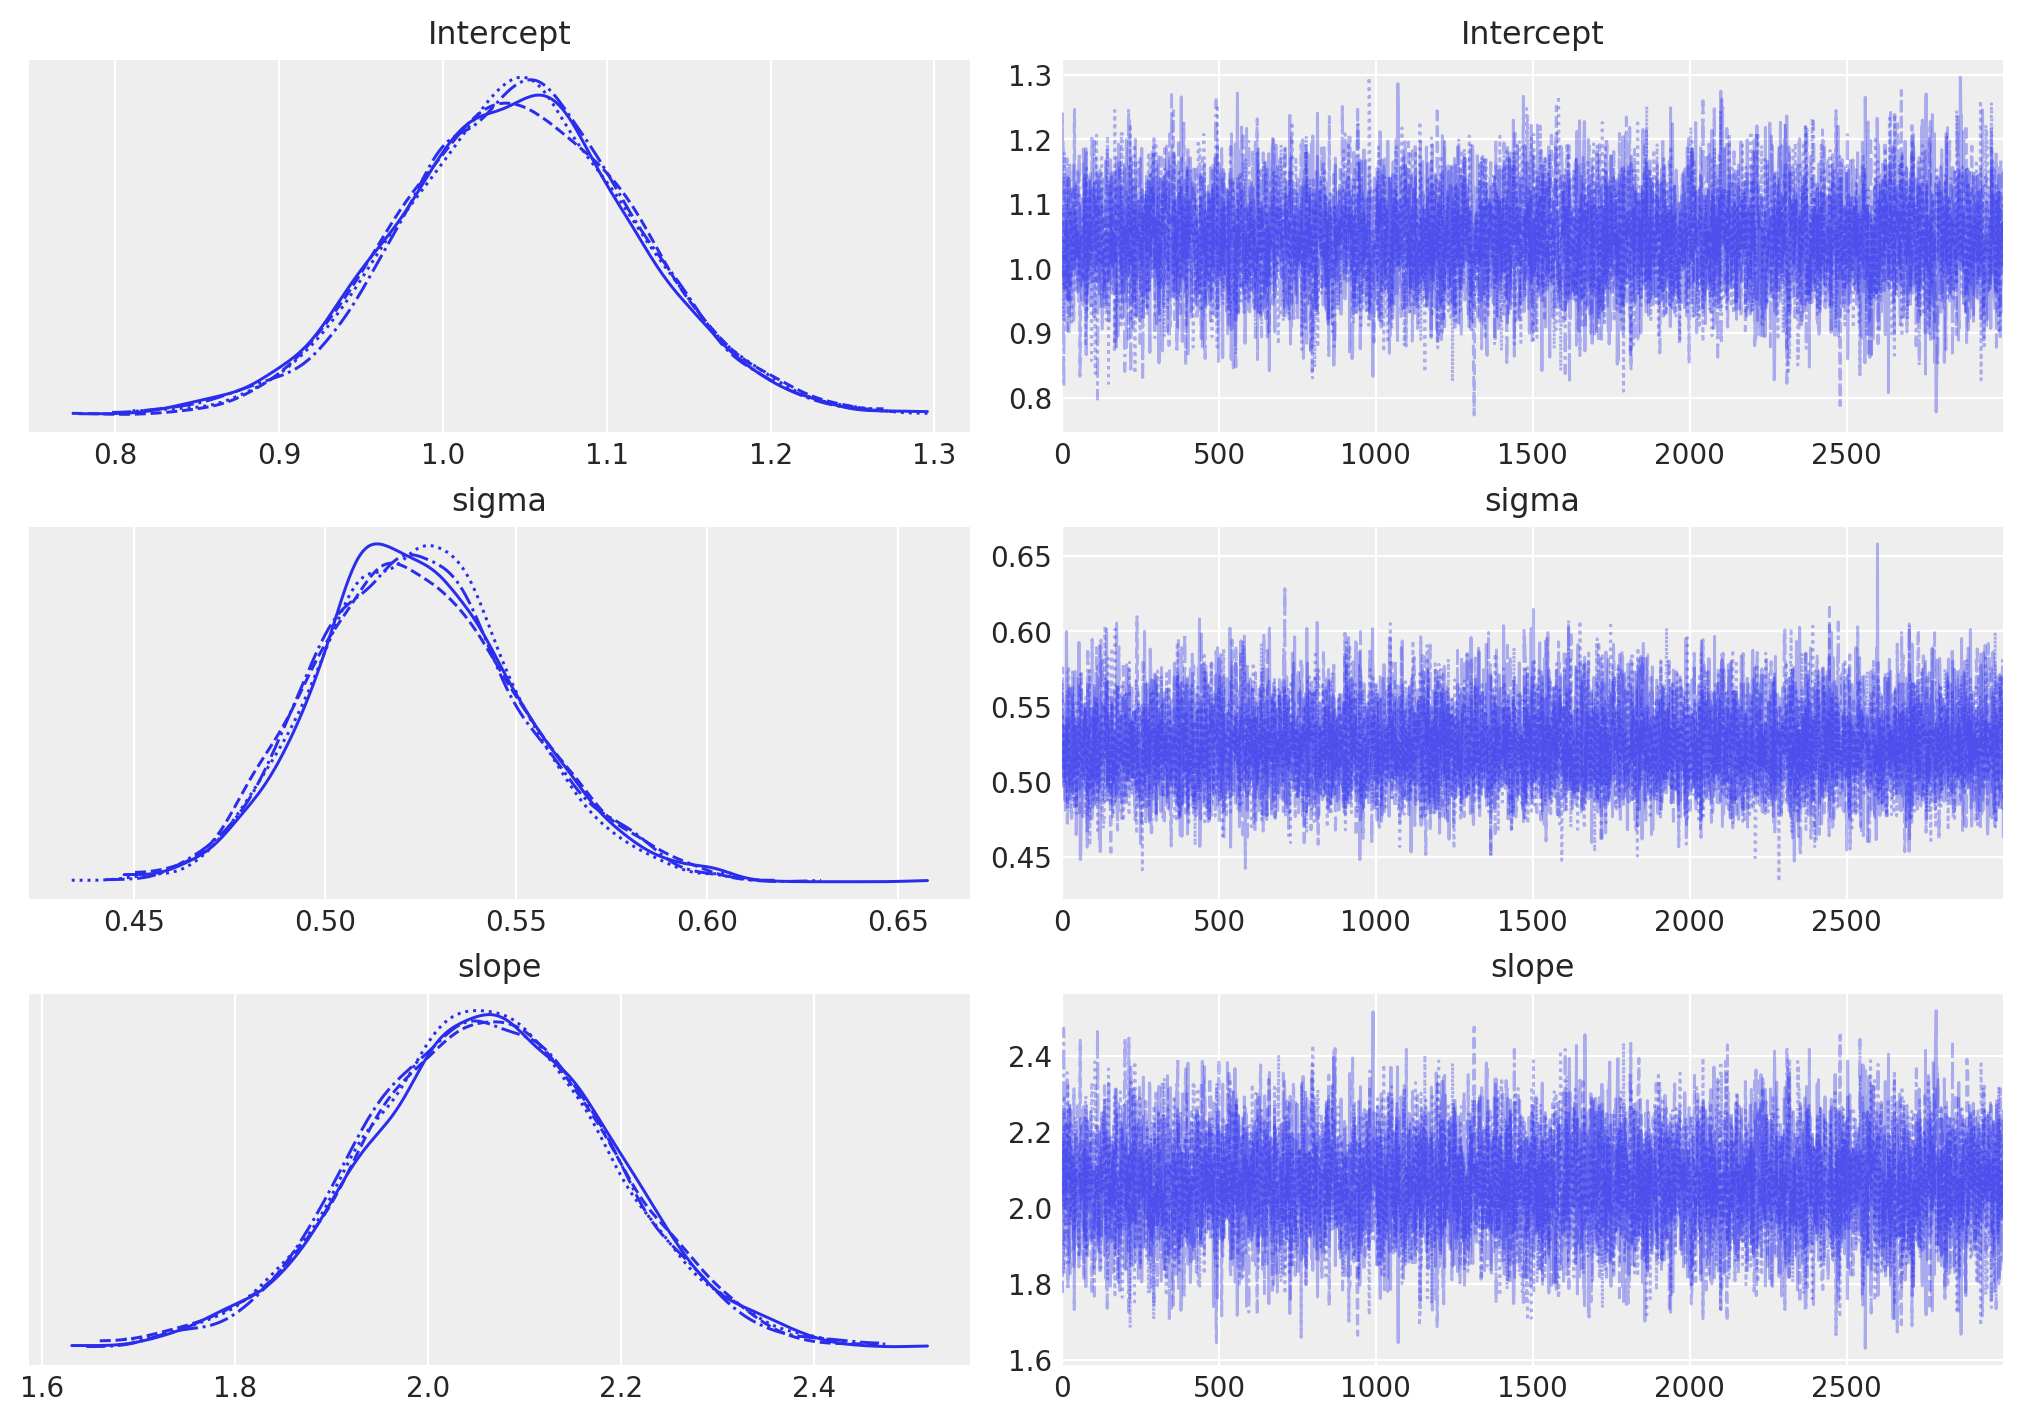

In [10]:
az.plot_trace(idata, figsize=(10, 7));

In [12]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["slope"] * xr.DataArray(x)

/usr/local/lib/python3.12/site-packages/arviz/plots/lmplot.py:212: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


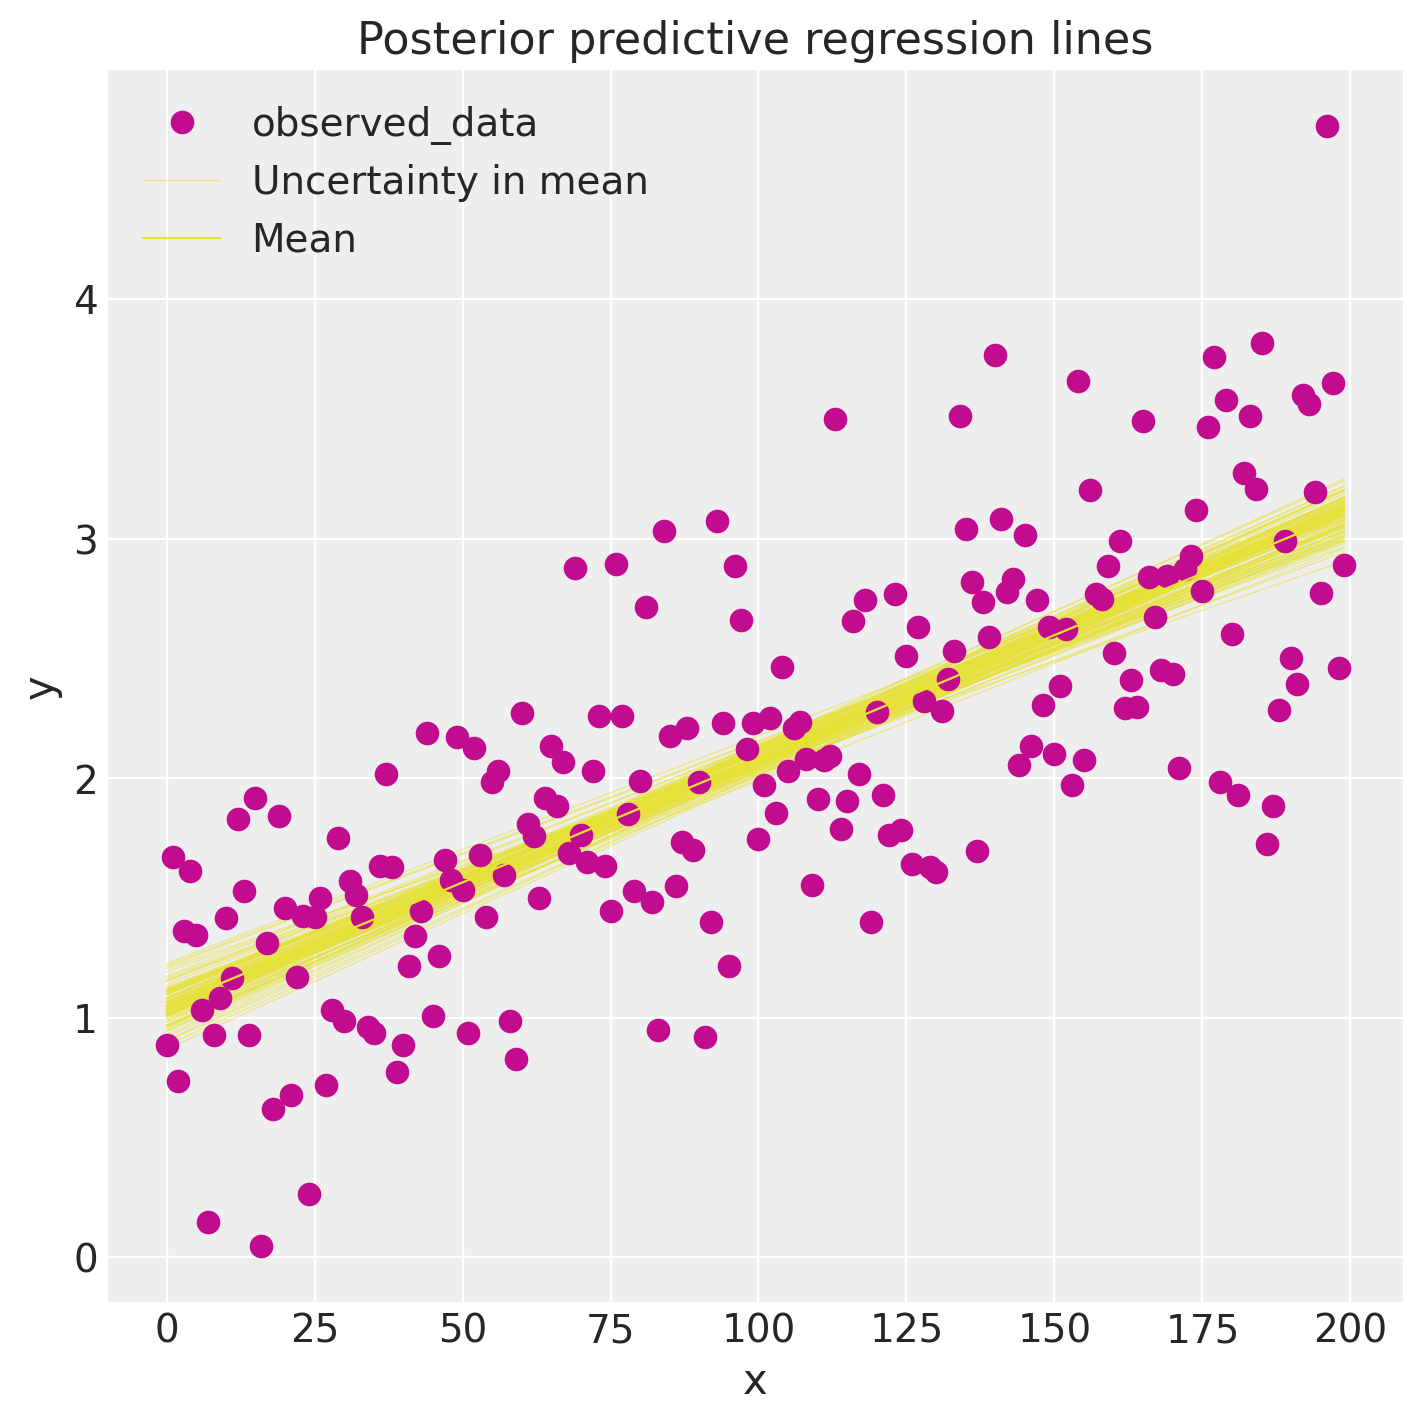

In [13]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");

In [18]:
# サンプルデータ生成
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size = N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real*x
y = y_real + eps_real

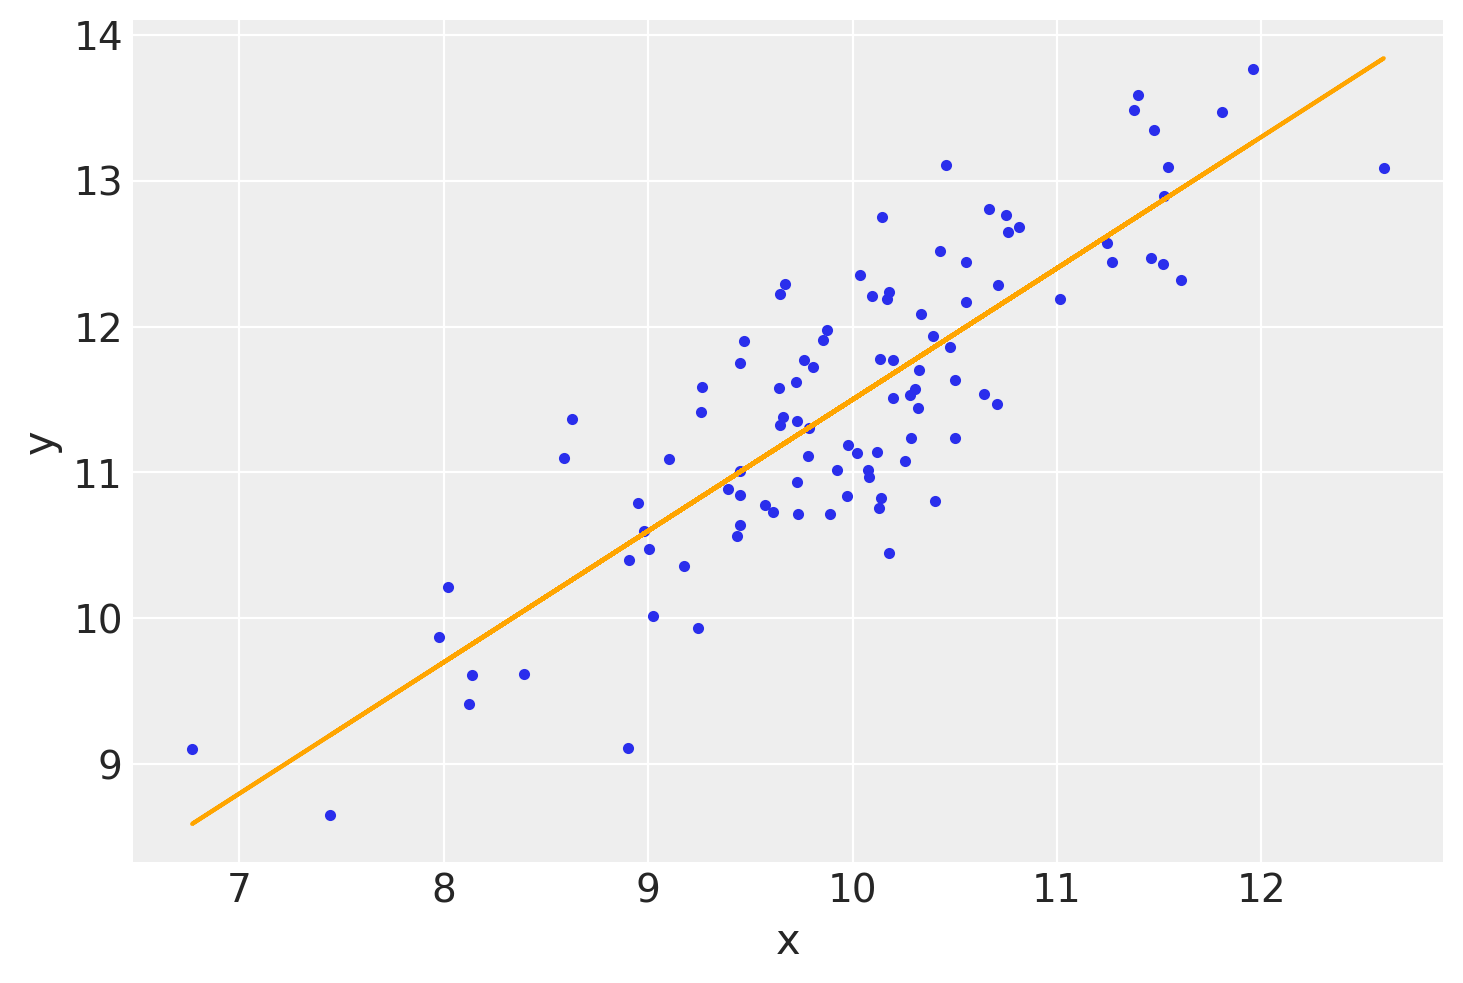

In [19]:
# データの可視化
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_real, 'orange')
plt.show()

In [20]:
import pymc as pm
with Model() as model:
    # 事前分布を設定
    alpha = pm.Normal('alpha', 0, sigma=100)
    beta = pm.Normal('beta', 0, sigma=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    # 尤度の計算
    y_pred = pm.Normal('y_pred',mu = alpha + beta*x, sigma = epsilon, observed = y)
    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, epsilon]


/usr/local/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 15 seconds.


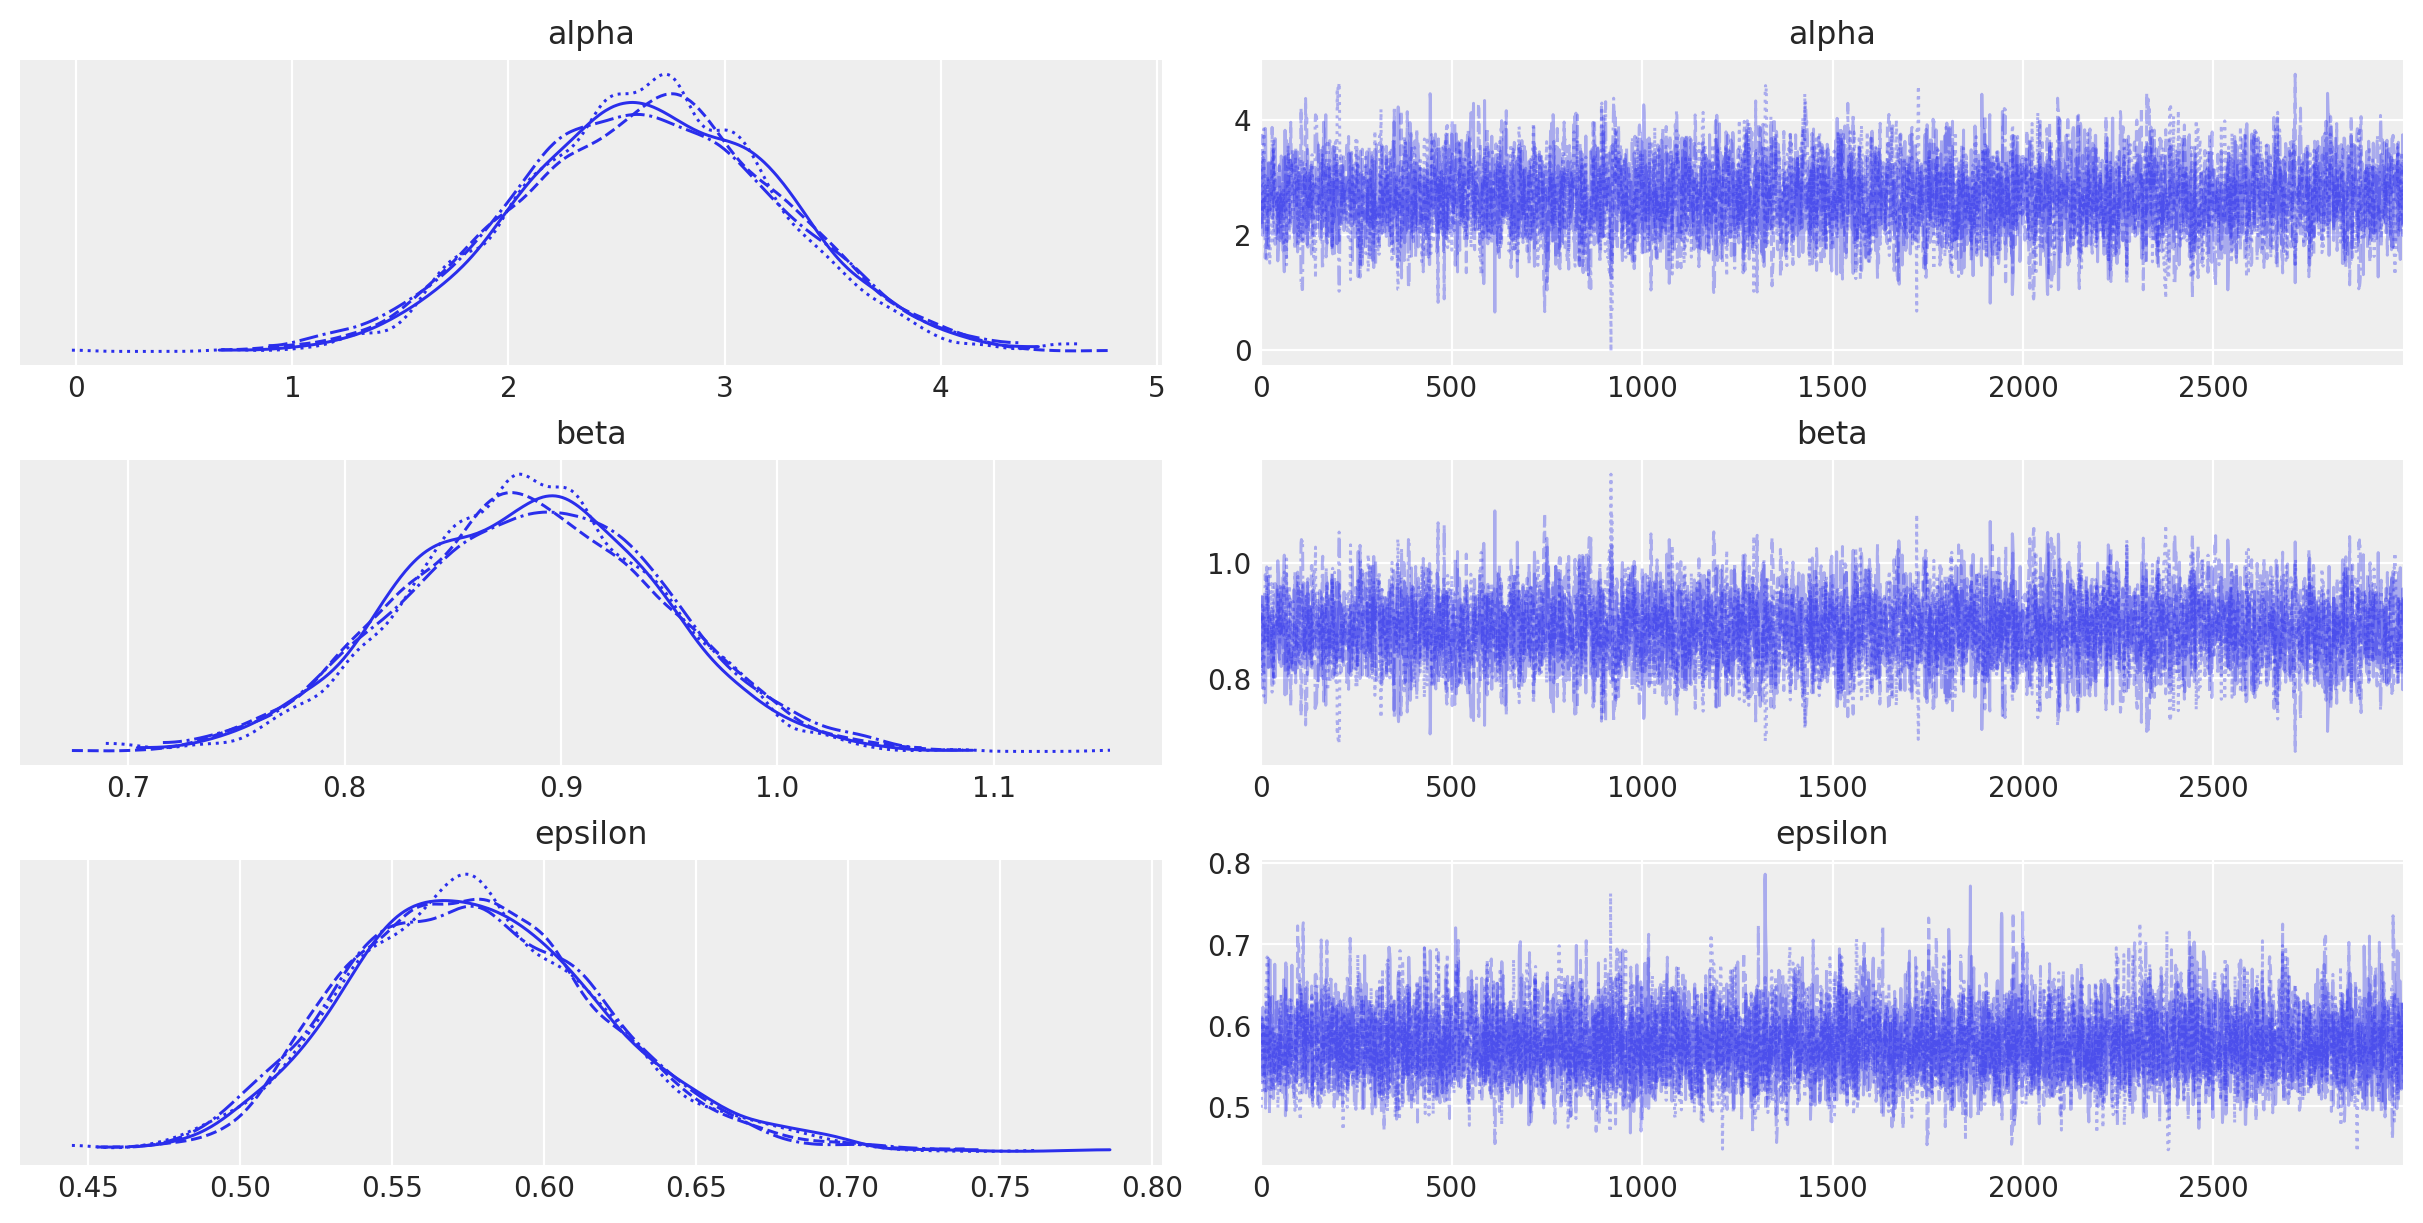

In [22]:
# トレースプロット
az.plot_trace(trace);

In [23]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.654,0.594,1.546,3.752,0.010,0.007,3385.0,4090.0,1.0
beta,0.886,0.059,0.777,0.998,0.001,0.001,3380.0,4080.0,1.0
epsilon,0.577,0.042,0.496,0.654,0.001,0.000,5360.0,4743.0,1.0


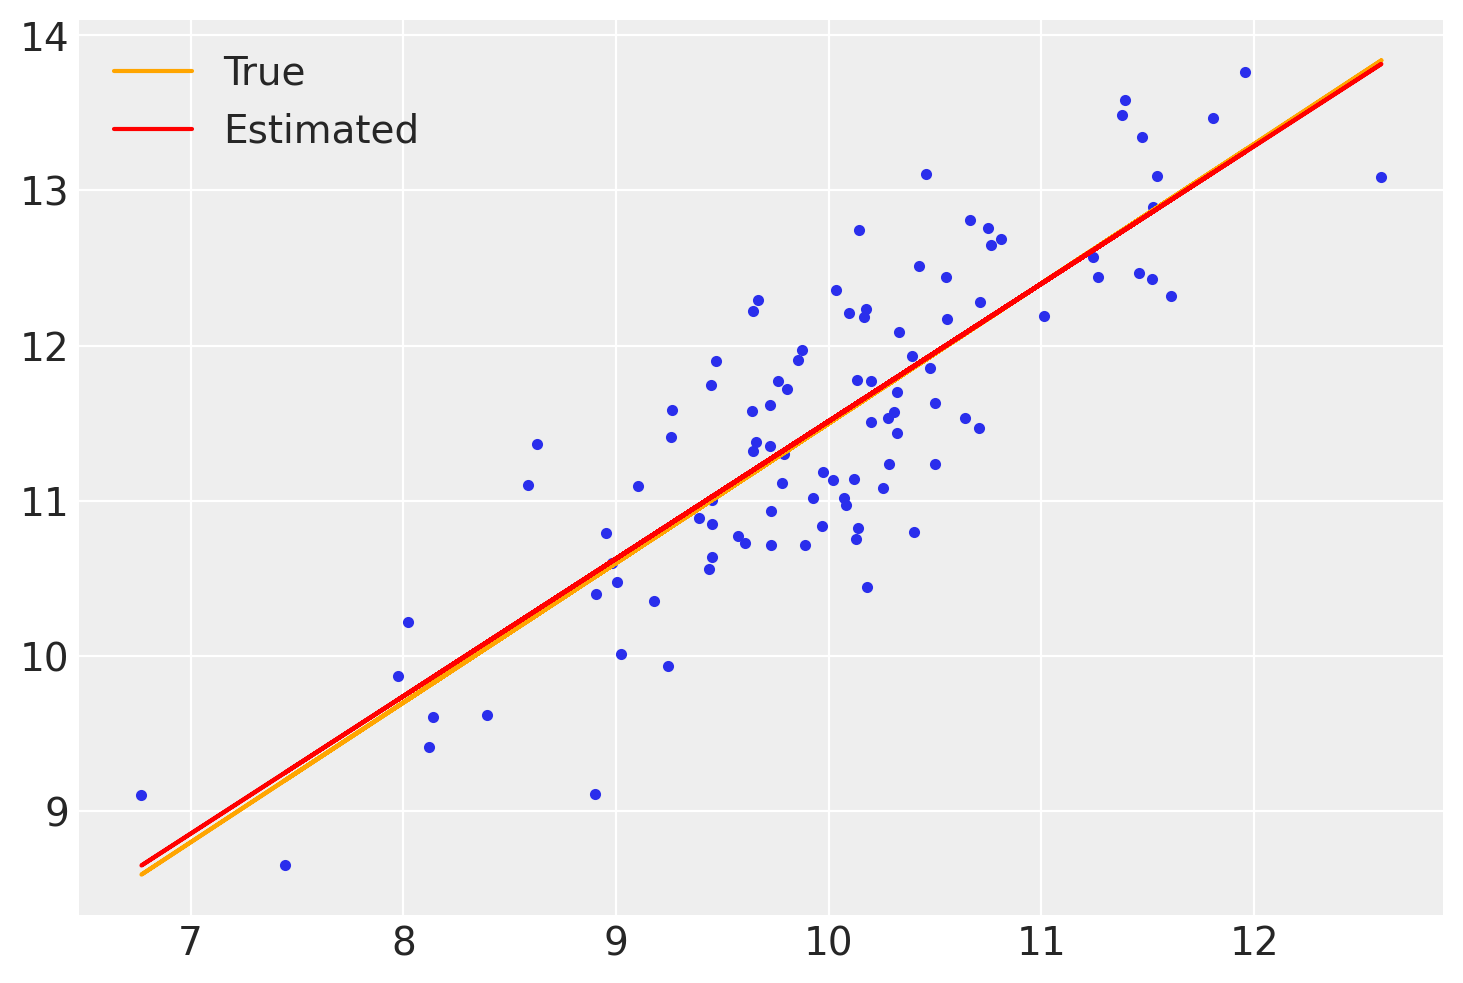

In [50]:
# α, βの値の取得（シミュレーション結果の平均値を各パラメータの代表値とする）
alpha_m = trace.posterior['alpha'].mean().values
beta_m = trace.posterior['beta'].mean().values

# 可視化
plt.plot(x, y, '.')
plt.plot(x, y_real, 'orange', label='True')
plt.plot(x, alpha_m + beta_m*x, 'red', label='Estimated')
plt.legend()


In [51]:
alpha_m

array(2.65355628)

In [52]:
beta_m

array(0.88597696)

In [53]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,2.654,0.594,1.546,3.752,0.010,0.007,3385.0,4090.0,1.0
beta,0.886,0.059,0.777,0.998,0.001,0.001,3380.0,4080.0,1.0
epsilon,0.577,0.042,0.496,0.654,0.001,0.000,5360.0,4743.0,1.0
